## Analisis de Datos Raspberry de 04 Octubre a 05 de Noviembre 2023

In [1]:
#importamos las librerias que vamos a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from datetime import datetime

In [2]:
listfile=glob.glob("2023*.csv") #creamos una lista con todos los archivos csv que sigan el patron de nombre

In [3]:
listfile.sort() #acomodamos los archivos de nuestra lista del mas antiguo al mas reciente

In [4]:
#concatenamos los datos en nuestra lista en un solo DataFrame
data=[]
for files in listfile:
    data.append (pd.read_csv(files))
datafull=pd.concat(data,ignore_index=True)

In [5]:
tiempo=pd.to_datetime(datafull["Datetime"][:],format="%Y-%m-%d %H:%M:%S") #convertimos la columna de las fechas de string a formato Datetime y la asignamos a una variable

In [6]:
datafull=datafull.drop(["Datetime"], axis=1) #quitamos la columna de tiempo de nuestro DataFrame

In [7]:
datafull.insert(0,"Tiempo", tiempo, True) #insertamos la variable de tiempo en el DataFrame

In [8]:
datafull=datafull.sort_values(by=["Tiempo"], ignore_index=True) #acomodamos el DataFrame por la columna de Tiempo

In [9]:
datafull["Presion"].replace(0, np.nan, inplace=True) #Reemplazamos los ceros por NaN

In [10]:
datafull.drop([1406], axis=0, inplace=True) #quitamos la unica fila con un NaT

In [11]:
datafull["Presion"].interpolate(method='polynomial', order=2, inplace=True) #interpolamos los valores donde hay NaN

In [12]:
datafull

,Tiempo,Humedad,Temperatura,Presion
0,2023-10-04 09:42:03,58.66,28.72,NaN
1,2023-10-04 10:12:30,39.22,38.66,810.82
2,2023-10-04 10:43:06,36.35,40.07,810.91
3,2023-10-04 11:13:41,35.29,40.18,811.08
4,2023-10-04 11:44:17,34.28,40.37,811.22
...,...,...,...,...
1401,2023-11-05 21:30:02,42.29,32.06,812.55
1402,2023-11-05 22:00:02,42.96,32.17,812.60
1403,2023-11-05 22:30:01,42.81,32.04,812.76
1404,2023-11-05 23:00:02,44.57,31.64,813.03


In [13]:
datafull.to_csv("DatosRaspberry_Final.csv") #guardamos nuestro DataFrame como un csv

In [14]:
datafull.describe() #Observamos valores importantes de nuestro DataFrame

,Humedad,Temperatura,Presion
count,1406.000000,1406.000000,1405.000000
mean,33.646259,36.908890,814.163307
std,4.886290,3.591043,6.894187
min,18.180000,27.360000,795.070000
25%,30.820000,34.720000,811.346632
50%,33.960000,37.100000,813.940000
75%,37.057500,39.085000,817.200000
max,58.660000,47.360000,827.370000


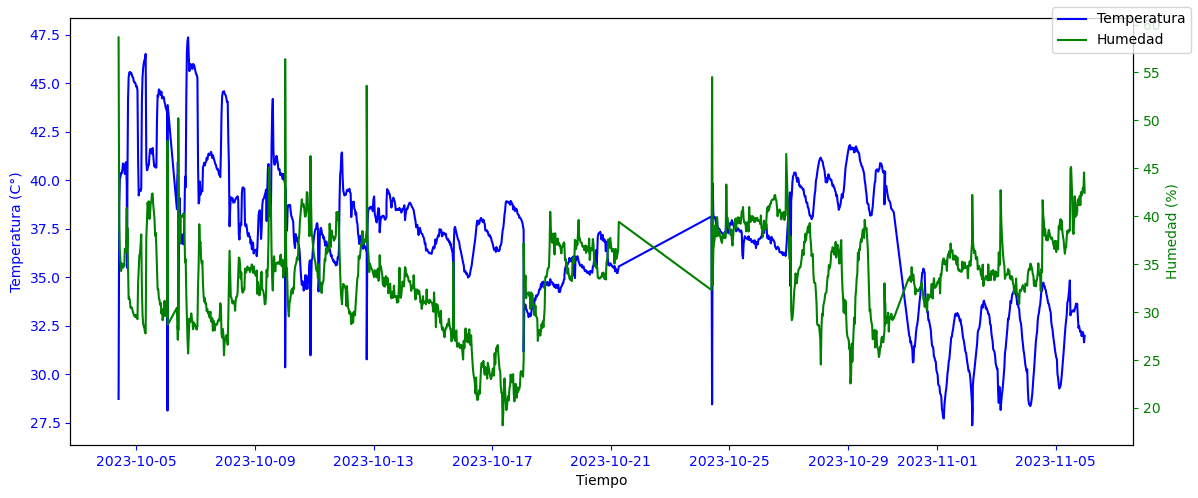

In [17]:
#Creamos figura comparando la humedad y la temperatura a traves del tiempo
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.set_xlabel("Tiempo", color="k")
ax1.set_ylabel("Temperatura (C°)", color="b")
ax1.plot(datafull["Tiempo"], datafull[" Temperatura"], label="Temperatura", color="b")
ax1.tick_params(colors="b")
ax2=ax1.twinx()
ax2.set_ylabel("Humedad (%)", color="g")
ax2.plot(datafull["Tiempo"], datafull["Humedad"], label="Humedad", color="g")
ax2.tick_params(colors="g")
fig.legend()
fig.tight_layout()

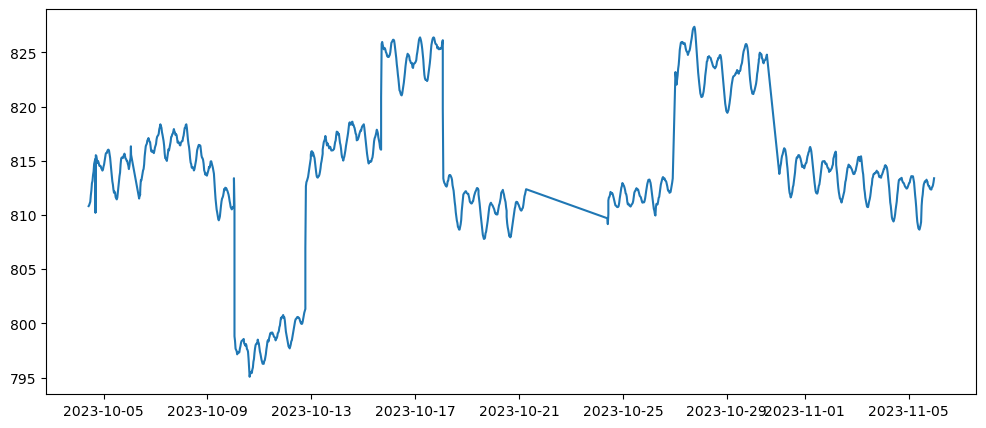

In [18]:
#Creamos una figura comparando la Presión con el Tiempo
plt.figure(figsize=(12,5))
plt.plot(datafull["Tiempo"], datafull["Presion"])

## Creamos Histogramas de cada una de las variables

Text(0.5, 0, 'Temperatura (°C)')

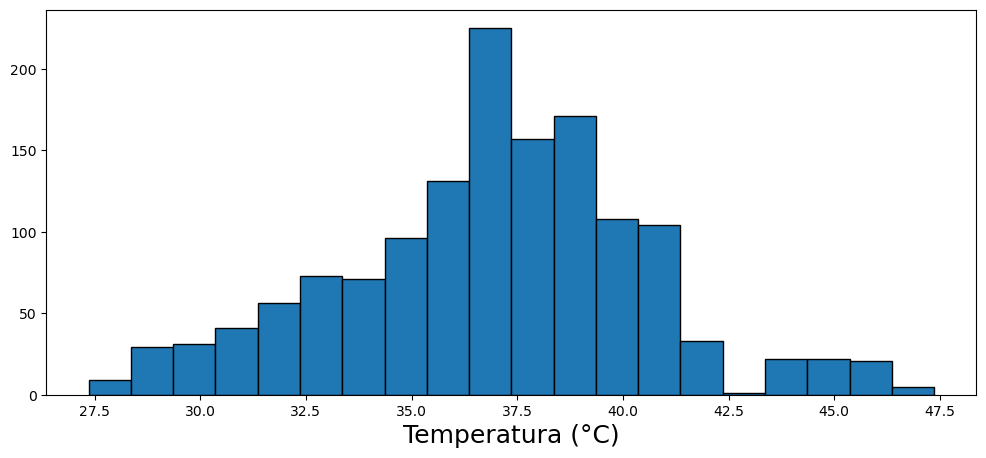

In [18]:
plt.figure(figsize=(12,5))
plt.hist(datafull[" Temperatura"], bins=20, edgecolor="k")
plt.xlabel("Temperatura (°C)", fontsize=18)

Text(0.5, 0, 'Humedad')

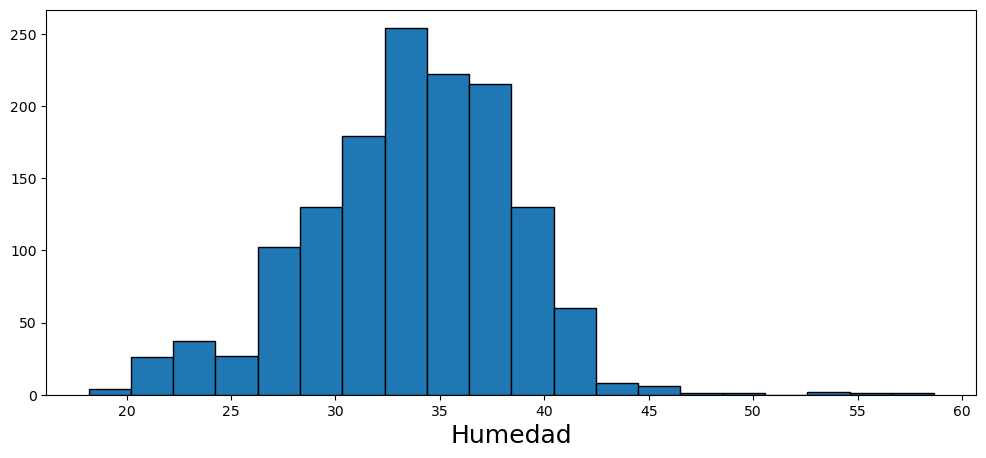

In [19]:
plt.figure(figsize=(12,5))
plt.hist(datafull["Humedad"], bins=20, edgecolor="k")
plt.xlabel("Humedad", fontsize=18)

Text(0.5, 0, 'Presión')

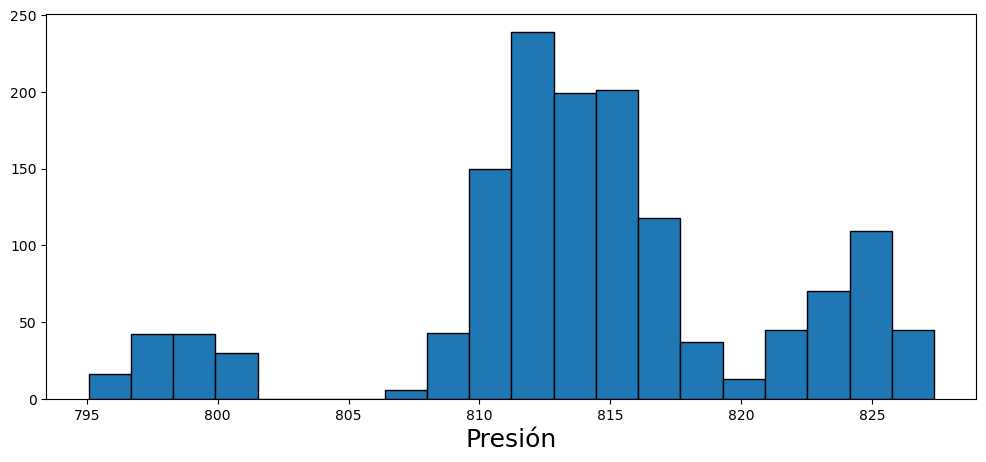

In [20]:
plt.figure(figsize=(12,5))
plt.hist(datafull["Presion"], bins=20, edgecolor="k")
plt.xlabel("Presión", fontsize=18)

## Codigo Toma de Datos Raspberry
    
```python
    
    from datetime import datetime
    import numpy as np
    import os
    import time
    from sense_hat import SenseHat
    sense=SenseHat()
    while 1:
        namefile=datetime.now().strftime("%Y-%m-%d")+".csv"
        if not os.path.exists("/home/computo/Desktop/Datos_SenseHat/"+namefile):
            f=open("/home/computo/Desktop/Datos_SenseHat/"+namefile,"w")
            f.write("Datetime,Humedad,Temperatura,Presion\r\n")
            f.close()
        else:
            d=open("/home/computo/Desktop/Datos_SenseHat/"+namefile,"a")
            d.write(datetime.now().strftime("%Y-%m-%d %H:%M:%S))
            humidity=sense.get_humidity()
            temp=sense.get_temperature()
            pressure=sense.get_pressure()
            d.write(",{:.2f},{:.2f},{:.2f}\r\n".format(humidty,temp,pressure))
            d.close()
            print("OK")
            message="T: "+str(temp)+" P: "+str(presssure)+" H: "+str(humidity)
            sense.show_message(message,scroll_speed=0.10)